# Keras for Beginners: Implementing a Convolutional Neural Network
A beginner-friendly guide on using Keras to implement a simple Convolutional Neural Network (CNN) in Python.
## https://victorzhou.com/blog/keras-cnn-tutorial/
# mnist dataset (handwriting)


In [ ]:
# The full CNN code!
####################
# import libraries
import numpy as np
from keras. datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# load data
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
print(train_images.shape)
print(test_images.shape)

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

In [ ]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13610 (53.16 KB)
Trainable params: 13610 (53.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


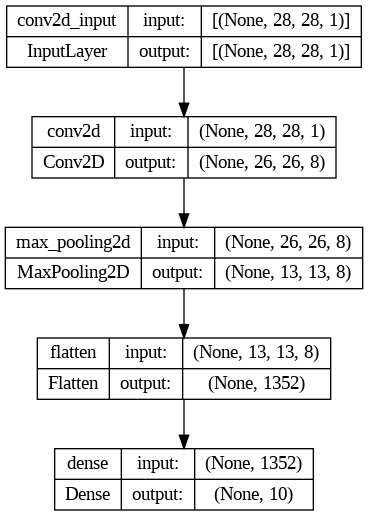

In [ ]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()
# from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model.
hist=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=30,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3734 - accuracy: 0.8928 - val_loss: 0.2394 - val_accuracy: 0.9302
Epoch 2/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1980 - accuracy: 0.9432 - val_loss: 0.1521 - val_accuracy: 0.9572
Epoch 3/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1372 - accuracy: 0.9609 - val_loss: 0.1170 - val_accuracy: 0.9658
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1077 - accuracy: 0.9690 - val_loss: 0.1003 - val_accuracy: 0.9718
Epoch 5/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0908 - accuracy: 0.9739 - val_loss: 0.0928 - val_accuracy: 0.9705
Epoch 6/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 0.0858 - val_accuracy: 0.9734
Epoch 7/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0719 - accuracy: 0.9786 - val_loss: 0.0800 -

1/1 [==============================] - 0s 132ms/step
[7 2 1 0 4]
[7 2 1 0 4]


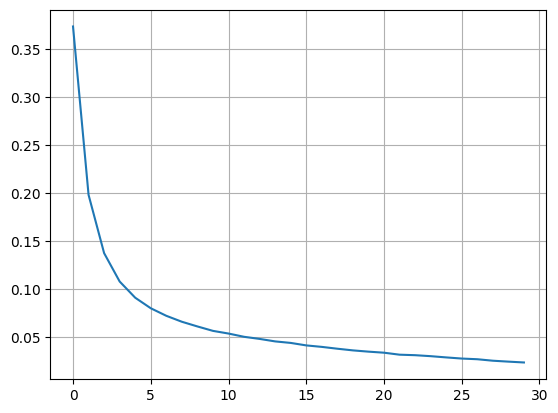

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.grid()

# Save the model to disk.
#model.save_weights('cnn.h5')

# Load the model from disk later using:
# model.load_weights('cnn.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]